# Week 8 Monday

## Announcements

* Last week's videos due.
* This week's videos posted (due Friday before lecture).
* Worksheets 11 and 12 due tomorrow.  (I'm not going to officially change the listed due time, but feel free to upload the worksheets Tuesday night if that is more convenient.)
* Everyone has received 10/10 on Quiz 5, but you should still look at [the posted sample questions](https://canvas.eee.uci.edu/courses/49027/files/20613483?wrap=1).
* Midterm 2 is cancelled.  That component of the course grade will be replaced by the higher score of Midterm 1 and the Course Project.
* I have office hours after class Monday at 11am, next door in ALP 3610.

In [1]:
import pandas as pd
import seaborn as sns

## Removing some rows and columns

So far we have seen one example of unsupervised learning and one example of supervised learning (what were they?).  Now we will see another example of supervised machine learning.


* Import the penguins dataset from Seaborn.
* Drop the columns "island" and "sex" from the DataFrame, because we won't be using those categorical variables.
* Drop the rows which contain missing values.  (Be sure to do this after dropping the "island" and "sex" columns, not before.)
* Store the resulting DataFrame as `df`.  Use the `copy` method just to be safe (I don't think it is necessary here, but it is necessary in today's worksheet).

In [2]:
df_temp = sns.load_dataset("penguins")

In [3]:
df_temp.drop(["island", "sex"], inplace=True, axis=1)

In [4]:
df = df_temp.dropna(axis=0).copy()

We are going to perform classification using the following data.  The only option for the target is the "species" column (the others would correspond to regression problems, not classification problems).

In [5]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


## Divide the data using `train_test_split`

A very important concept in Machine Learning, which we have not used so far in Math 10, is the concept of a *test set*.  The idea is that we divide the data into a training set and a test set.  We fit our Machine Learning model using only the training set.  If the model performs significantly better on the training set than on the test set, that is a sign that we are likely overfitting the data.

Split the data into training data and test data.

* Use the `train_test_split` function from scikit-learn's `model_selection` module.
* Use all remaining columns *except* "species" for `X` (the input).
* Use the "species" column for `y` (the output, also called the target).
* Use 90% of the rows for the training set.
* Specify `random_state=0` so that we have reproducible results (any other integer would be equally valid).

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
input_cols = [c for c in df.columns if c != "species"]
input_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [8]:
X = df[input_cols]
y = df["species"]

I wanted to be sure that overfitting is recognizable in the second example below, so I specified a `random_state` when doing the split into training data and test data.  (The first random state I tried worked, and I would expect that most choices would work equally well.)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [10]:
X.shape

(342, 4)

Notice how `X_train` contains approximately 90% of the rows of `X`.  That corresponds to our `train_size=0.9` keyword argument.

In [11]:
X_train.shape

(307, 4)

## A Decision Tree classifier using `max_leaf_nodes=3`

So far we have seen an example of unsupervised machine learning (K-means clustering) and an example of regression in supervised machine learning (linear regression).  Now we will see the third big category, which is classification (which is also a part of supervised machine learning, like regression).  In regression problems, we are trying to predict a continuous quantity.  In classification problems, we are trying to predict membership in a discrete category.

Unrestricted decision trees are very prone to overfitting.  Here we will restrict the tree by specifying that the tree can have at most three *leaves*.


* Instantiate a `DecisionTreeClassifier` from `sklearn.tree`, specifying `max_leaf_nodes=3` as a keyword argument to the constructor.

In [12]:
y_train[:3]

8         Adelie
290       Gentoo
191    Chinstrap
Name: species, dtype: object

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)

* Fit the classifier using the training data.

In [15]:
# Never fit using the test data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

* What is the accuracy on the training data (i.e., what proportion of predictions are correct)?  Compute this using the classifier's `score` method.

In [16]:
clf.score(X_train, y_train)

0.9478827361563518

* What is the accuracy on the test data?  Do these results suggest overfitting?

**Note**.  We will later see a more refined measure, `log_loss`.  With `score`, a higher number means better performance.  With `log_loss` (as with every error function/loss function/cost function), a lower number is better.

In [17]:
clf.score(X_test, y_test)

0.9714285714285714

* Make a diagram representing this decision tree, using the `plot_tree` function from `sklearn.tree` and the following code.  (Be sure to import the Matplotlib Pyplot module as `plt`.)

```
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)
```

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Take a minute to look at the following figure and understand what it's saying.  First of all, there are three leaf nodes, because there are three "final" rectangles (i.e., three rectangles that don't lead anywhere).  Don't worry about what "gini" means.  The `value` list corresponds to the different possible classes, listed in alphabetical order.  The final `class` value corresponds to the most frequent class for that portion of the data.

For example, if we asked our Decision Tree Classifier to predict the species for a penguin with flipper length 200 and bill length 50 (no matter what the values of body mass or bill depth), we would start at the top rectangle, then move to the left because flipper length is less than 206.5, then move to the right because the bill length is greater than 43.35.  We would wind up in a group of penguins with 4 Adelie penguins, 52 Chinstrap penguins, and 1 Gentoo penguin.  The classifier would then predict Chinstrap.

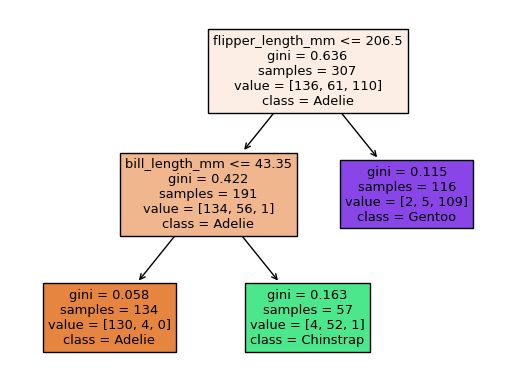

In [21]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

## A Decision Tree classifier using `max_leaf_nodes=8`

If we increase the maximum number of nodes, the tree becomes more flexible, and overfitting becomes more likely.

* Repeat the above process using `max_leaf_nodes=8` (starting at the step where we instantiated the classifier).
* Do the results suggest overfitting?
* Use `figsize=(20,10)` to make the diagram a little bigger.  (I don't really understand what the numbers in `figsize` represent.  My best guess is that they control the size, but then Deepnote adjusts the size automatically.)

In [22]:
clf8 = DecisionTreeClassifier(max_leaf_nodes=8)

In [23]:
clf8.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

The training score improved (got higher), but that is not necessarily a good sign.  It could mean we are overfitting the training data.

In [24]:
clf8.score(X_train, y_train)

0.990228013029316

Indeed, the test score got worse (it decreased from 97% to 94%).  This divergence between training score and test score is a sign of overfitting.

In [25]:
# Evidence of overfitting: performance on the test set got worse
clf8.score(X_test, y_test)

0.9428571428571428

Notice how much more complicated the resulting decision tree is.  (Count and make sure you agree it has 8 leaf nodes.)  Allowing more leaf nodes leads to more flexibility, and because the score on the test set got worse, we expect overfitting.  (We won't ever be able to "prove" in Math 10 that a machine learning model overfits the data... the best we can do is make arguments similar to the argument above.)

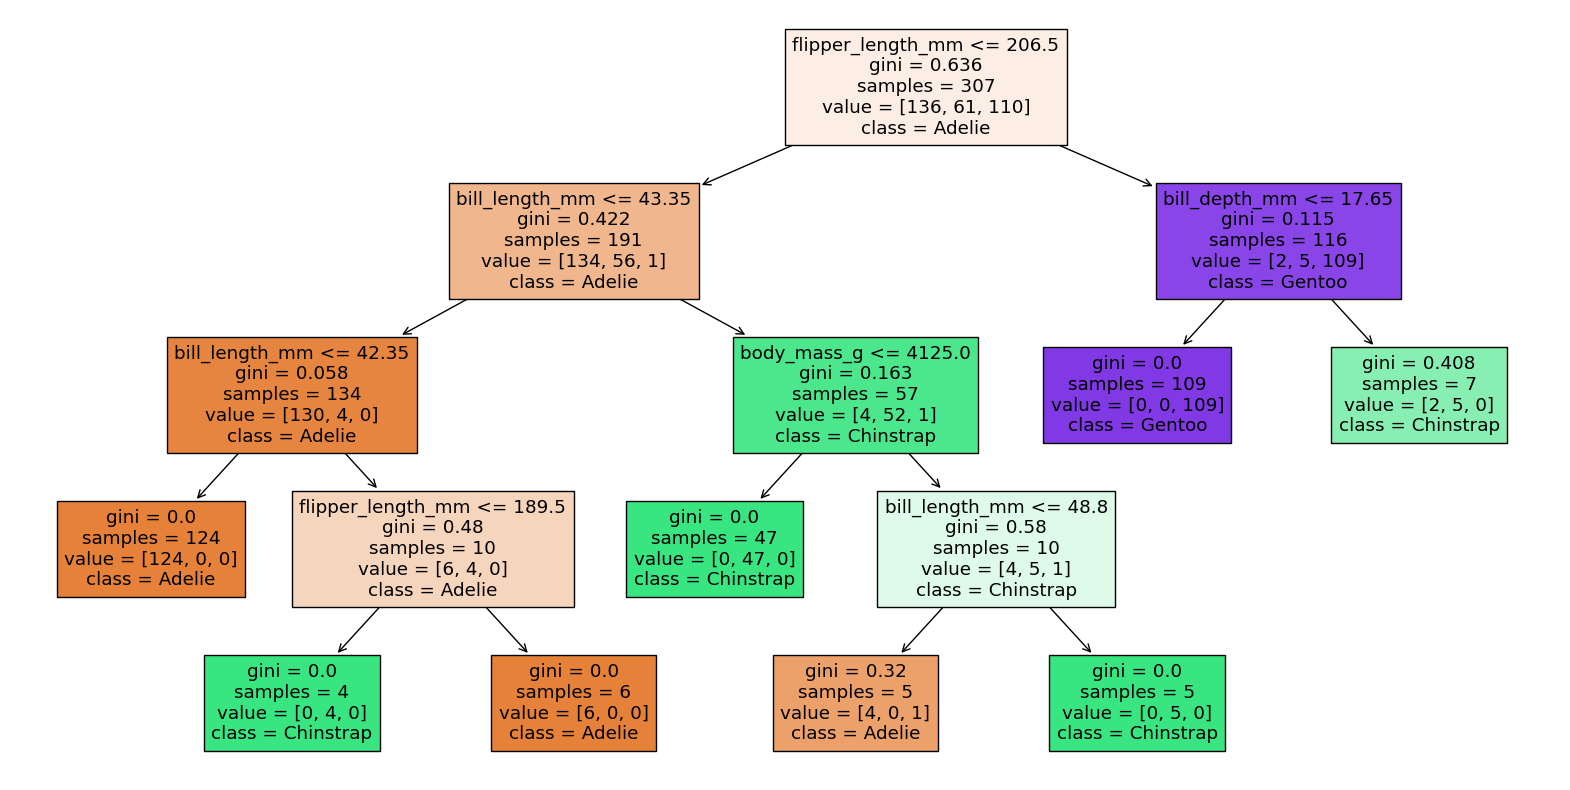

In [26]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf8, 
                   feature_names=clf8.feature_names_in_,
                   class_names=clf8.classes_,
                   filled=True)

If we were to do another example with `max_leaf_nodes=1000000`, we wouldn't find a decision tree with a million leaf nodes, because once each leaf is completely homogeneous (meaning it contains all penguins of the same species), there is no reason to split further.

Overfitting also relates very much to Polynomial Regression.  In general, the higher the degree of polynomial we use, the more flexible the model, and the more likely it is to be overfitting the data.

We didn't get to the following two (short) topics on Monday.

## The depth of a decision tree

Above, we restricted the tree by using the `max_leaf_nodes` keyword argument.  Another option is to use the `max_depth` keyword argument.

What is the depth of the previous tree?  

* Answer by calling the classifier's `get_depth` method.
* Answer by looking at the above diagram.

## Using the classifier to rank feature importance

* List the calculated feature imporances (stored in the `feature_importances_` attribute of the classifier) as the values in a pandas Series.  Use the column names as the index.  Order the Series from most important to least important.